In [30]:
# Install libraries
%pip install pandas matplotlib seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 30.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 16.8 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

print("Libraries imported successfully!")

Libraries imported successfully!


In [15]:
# Load and Clean Data
file_name = "Spotify_Dataset_V3.csv"

print(f"Loading data from {file_name}...")
try:
    df = pd.read_csv(file_name, on_bad_lines='skip', sep=';')
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"File {file_name} not found.")
    raise

Loading data from Spotify_Dataset_V3.csv...
Data loaded successfully!


In [16]:
# DEBUG cell: Checking column names
for col in df.columns:
    print(f"'{col}'")

'Rank'
'Title'
'Artists'
'Date'
'Danceability'
'Energy'
'Loudness'
'Speechiness'
'Acousticness'
'Instrumentalness'
'Valence'
'# of Artist'
'Artist (Ind.)'
'# of Nationality'
'Nationality'
'Continent'
'Points (Total)'
'Points (Ind for each Artist/Nat)'
'id'
'Song URL'


In [17]:
# Checking column names
print("Column names in the dataset:")
print(df.columns)

Column names in the dataset:
Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality',
       'Nationality', 'Continent', 'Points (Total)',
       'Points (Ind for each Artist/Nat)', 'id', 'Song URL'],
      dtype='object')


In [18]:
# Cleanin Dates and Columns

try:
    original_date_col = 'Date' 
    date_format_str = '%d/%m/%Y'

    df[original_date_col] = pd.to_datetime(df[original_date_col], 
                                    format=date_format_str, 
                                    errors='coerce')
    
    # Drop rows where date conversion failed
    df.dropna(subset=[original_date_col], inplace=True)
    print("Date column cleaned successfully!")

    # Renaming columns for easier access
    df.rename(columns={
        'Date': 'date',
        'Artist (Ind.)': 'main_artist',
        'Title': 'title',
        'Points (Total)': 'points'
    }, inplace=True)

    # Final check
    print("Final column names after cleaning:")
    print(df[['date', 'main_artist', 'points', 'title']].info())

    print("Data sample after cleaning:")
    print(df[['date', 'main_artist', 'points', 'title']].head())

except KeyError as e:
    print(f"Column not found: {e}")
    raise
except Exception as e:
    print(f"An error occurred during data cleaning: {e}")
    raise

Date column cleaned successfully!
Final column names after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651936 entries, 0 to 651935
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         651936 non-null  datetime64[ns]
 1   main_artist  651936 non-null  object        
 2   points       651936 non-null  int64         
 3   title        651936 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 19.9+ MB
None
Data sample after cleaning:
        date     main_artist  points            title
0 2023-05-29  Eslabon Armado     200  Ella Baila Sola
1 2023-05-29      Peso Pluma     200  Ella Baila Sola
2 2023-05-29       Bad Bunny     199   WHERE SHE GOES
3 2023-05-29       Yng Lvcas     198  La Bebe - Remix
4 2023-05-29      Peso Pluma     198  La Bebe - Remix


In [21]:
# Analytics and Aggregations

print("Top 10 artists by total points:")
top_artists = df.groupby('main_artist')['points'].sum().sort_values(ascending=False).head(10)
print(top_artists)

# Calculating monthly audio feature trends
audio_features = [
    'Danceability', 
    'Energy', 
    'Loudness', 
    'Speechiness', 
    'Acousticness', 
    'Instrumentalness', 
    'Valence'
]

# Set 'date' as the index to group by month ('ME' = Month-End)
monthly_features = df.set_index('date')[audio_features].resample('ME').mean()
print(monthly_features.head())

# Calculating Weekly Popularity for Top 10 Artists
print("Weekly popularity for top 10 artists:")
top_10_artist_names = top_artists.index.tolist()

# Filter main DataFrame to only include those 10 artists
df_top10 = df[df['main_artist'].isin(top_10_artist_names)]

# Group by week ('W' = Week-Ending) and sum points
weekly_top10 = df_top10.groupby([
    'main_artist', 
    pd.Grouper(key='date', freq='W')
])['points'].sum().reset_index()
print(weekly_top10.head())

print("Analysis complete.")

Top 10 artists by total points:
main_artist
Bad Bunny        2019436
Post Malone      1295725
Ed Sheeran       1243482
J Balvin         1188150
The Weeknd       1135657
Drake            1063196
Billie Eilish     904437
Dua Lipa          846561
Ozuna             798520
Ariana Grande     731726
Name: points, dtype: int64
            Danceability    Energy     Loudness  Speechiness  Acousticness  \
date                                                                         
2017-01-31      0.676349  0.663153 -5421.390958     0.118872      0.189034   
2017-02-28      0.674168  0.664282 -5361.735093     0.120968      0.200604   
2017-03-31      0.684339  0.657160 -5327.187876     0.124113      0.198529   
2017-04-30      0.692557  0.667696 -5246.150064     0.120353      0.180898   
2017-05-31      0.692619  0.676048 -5148.806050     0.111387      0.177832   

            Instrumentalness   Valence  
date                                    
2017-01-31          0.007810  0.489443  
2017-02-2

In [24]:
# Visualisation
import os 

# Create the 'images' directory if it doesn't already exist
images_dir = "images"
if not os.path.exists(images_dir):
    os.makedirs(images_dir)
    print(f"Directory '{images_dir}' created.")
else:
    print(f"Directory '{images_dir}' already exists.")
# Set the visual style for the plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

Directory 'images' created.


--- Plot 1: Top 10 Artists by Total Points ---


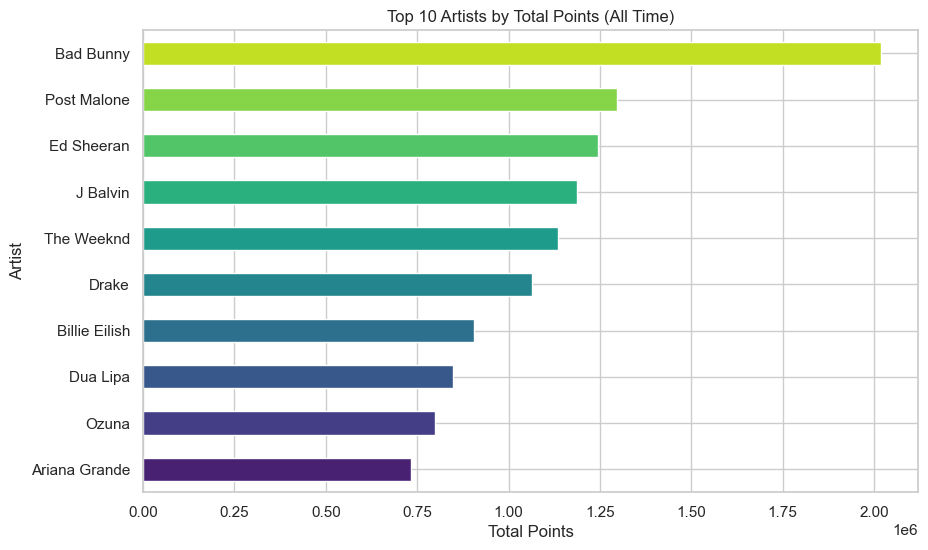

In [25]:
# Top 10 artists 
print("--- Plot 1: Top 10 Artists by Total Points ---")

plt.figure() # Create a new figure
top_artists.sort_values(ascending=True).plot(kind="barh", color=sns.color_palette("viridis", 10))
plt.title("Top 10 Artists by Total Points (All Time)")
plt.xlabel("Total Points")
plt.ylabel("Artist")

# Save the plot to the images folder
plt.savefig("images/top_10_artists_barh.png", bbox_inches='tight')
plt.show()

In [35]:
# Normalise Features for Plotting
from sklearn.preprocessing import MinMaxScaler

# Normalise all our audio features to a 0-1 scale
# This lets us plot them together, even 'Loudness'
scaler = MinMaxScaler()
monthly_features_normalized = pd.DataFrame(
    scaler.fit_transform(monthly_features), 
    columns=monthly_features.columns, 
    index=monthly_features.index
)

print("--- Normalized Audio Features (Sample) ---")
print(monthly_features_normalized.head())

--- Normalized Audio Features (Sample) ---
            Danceability    Energy  Loudness  Speechiness  Acousticness  \
date                                                                      
2017-01-31      0.322134  0.725912  0.529925     0.665742      0.185840   
2017-02-28      0.293385  0.740768  0.592529     0.700607      0.264779   
2017-03-31      0.427489  0.647016  0.628783     0.752900      0.250625   
2017-04-30      0.535839  0.785708  0.713826     0.690373      0.130330   
2017-05-31      0.536659  0.895651  0.815980     0.541277      0.109407   

            Instrumentalness   Valence  
date                                    
2017-01-31          0.380320  0.137839  
2017-02-28          0.357353  0.088976  
2017-03-31          0.469288  0.193118  
2017-04-30          0.621823  0.268977  
2017-05-31          0.218616  0.522629  



--- Plot 2: Monthly Average Audio Features in Top Charts ---


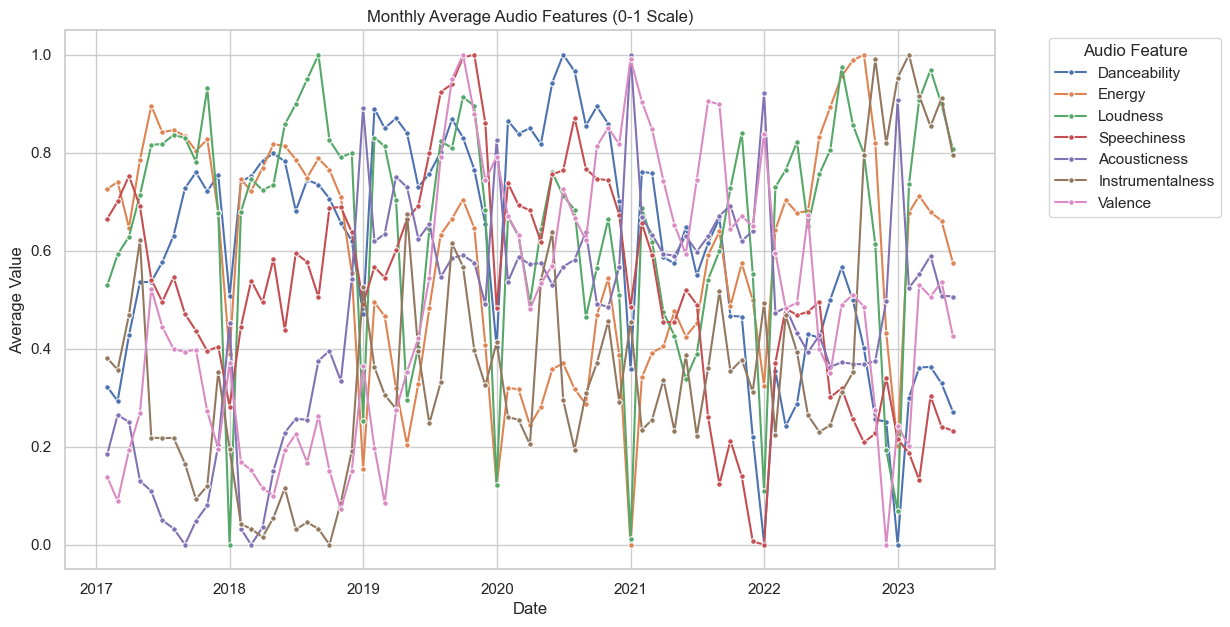

In [36]:
# Montly Audio Feature Trends
print("\n--- Plot 2: Monthly Average Audio Features in Top Charts ---")

plt.figure(figsize=(12, 7)) # Make this plot a bit wider
ax = sns.lineplot(data=monthly_features_normalized, dashes=False, marker="o", markersize=4)


plt.title("Monthly Average Audio Features (0-1 Scale)")
plt.ylabel("Average Value")
plt.xlabel("Date")
plt.legend(title="Audio Feature", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
plt.savefig("images/monthly_audio_features_scaled.png", bbox_inches='tight')
plt.show()


--- Plot 3: Weekly Popularity of Top 10 Artists ---


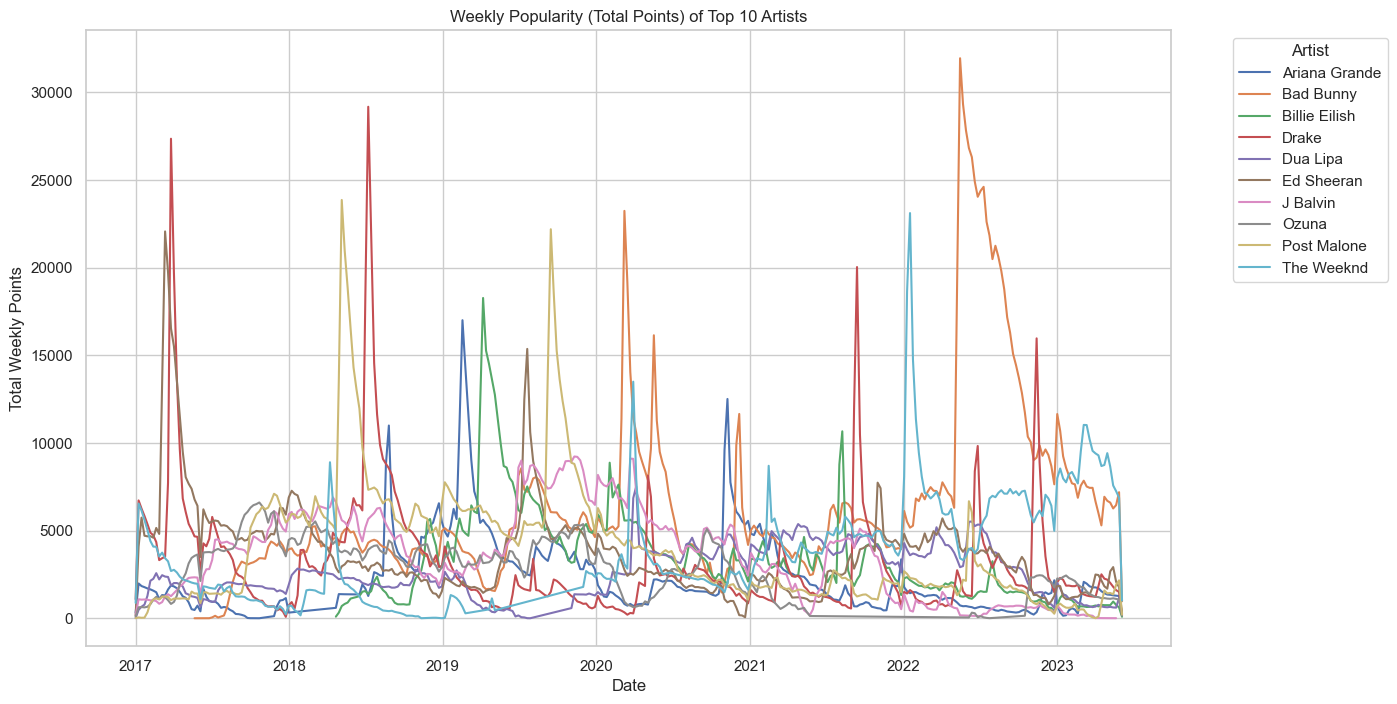

In [37]:
# Weekly Popularity of Top 10 Artists
print("\n--- Plot 3: Weekly Popularity of Top 10 Artists ---")

plt.figure(figsize=(14, 8)) # Make this one even bigger
ax = sns.lineplot(data=weekly_top10, x="date", y="points", hue="main_artist")

plt.title("Weekly Popularity (Total Points) of Top 10 Artists")
plt.ylabel("Total Weekly Points")
plt.xlabel("Date")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
plt.savefig("images/weekly_top10_artists.png", bbox_inches='tight')
plt.show()

In [38]:
# SQL Analysis
try:
    # Create an in-memory SQL database 
    conn = sqlite3.connect(":memory:")
    print("In-memory SQL database created.")

    # Send clean DataFrame to an SQL table (only using cleaned columns)
    columns_to_sql = [
        'date', 'main_artist', 'points', 'title', 
        'Danceability', 'Energy', 'Loudness', 'Valence'
    ]
    df_for_sql = df[columns_to_sql]
    
    df_for_sql.to_sql("streams", conn, if_exists="replace", index=False)
    print(f"DataFrame loaded into SQL table 'streams'.")

    # Creating query to find top 10 artists by points also showing average Danceability and song count
    query = """
    SELECT 
        main_artist, 
        AVG(Danceability) as avg_danceability,
        SUM(points) as total_points,
        COUNT(title) as total_songs
    FROM 
        streams
    GROUP BY 
        main_artist
    ORDER BY 
        total_points DESC
    LIMIT 10;
    """
    
    print("\n Running SQL Query for Top 10 Artists")
    sql_results = pd.read_sql_query(query, conn)
    
    # Close the database connection
    conn.close()

    print("SQL Query Results:")
    print(sql_results)

except Exception as e:
    print(f"An error occurred during SQL analysis: {e}")
    raise
except KeyError as e:
    print(f"Column not found during SQL analysis: {e}")
    raise

In-memory SQL database created.
DataFrame loaded into SQL table 'streams'.

 Running SQL Query for Top 10 Artists
SQL Query Results:
     main_artist  avg_danceability  total_points  total_songs
0      Bad Bunny          0.756581       2019436        16624
1    Post Malone          0.673936       1295725        11505
2     Ed Sheeran          0.695198       1243482        12837
3       J Balvin          0.745563       1188150        10659
4     The Weeknd          0.621993       1135657        10050
5          Drake          0.760532       1063196         9983
6  Billie Eilish          0.544862        904437         8614
7       Dua Lipa          0.735315        846561         7107
8          Ozuna          0.768234        798520         7463
9  Ariana Grande          0.682697        731726         6499
